In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
try:
  os.mkdir(f'/content/drive/MyDrive/Obj_detect')
except:
  pass

In [ ]:
os.chdir('/content/drive/MyDrive/Signal')

In [2]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="q5QPqN90ZJhzCk334PKv")
project = rf.workspace("hlcv2023finalproject").project("small-object-detection-for-euro-coins")
version = project.version(5)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Small-object-detection-for-euro-coins-5 in yolov8:: 100%|██████████| 3593/3593 [00:01<00:00, 3134.78it/s]


In [ ]:
dataset.location

'/content/drive/MyDrive/Obj_detect/Small-object-detection-for-euro-coins-5'

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=40 imgsz=512

100% 6.23M/6.23M [00:00<00:00, 99.5MB/s]
Ultralytics YOLOv8.2.29 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Obj_detect/Small-object-detection-for-euro-coins-5/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

In [ ]:
from IPython.display import Image


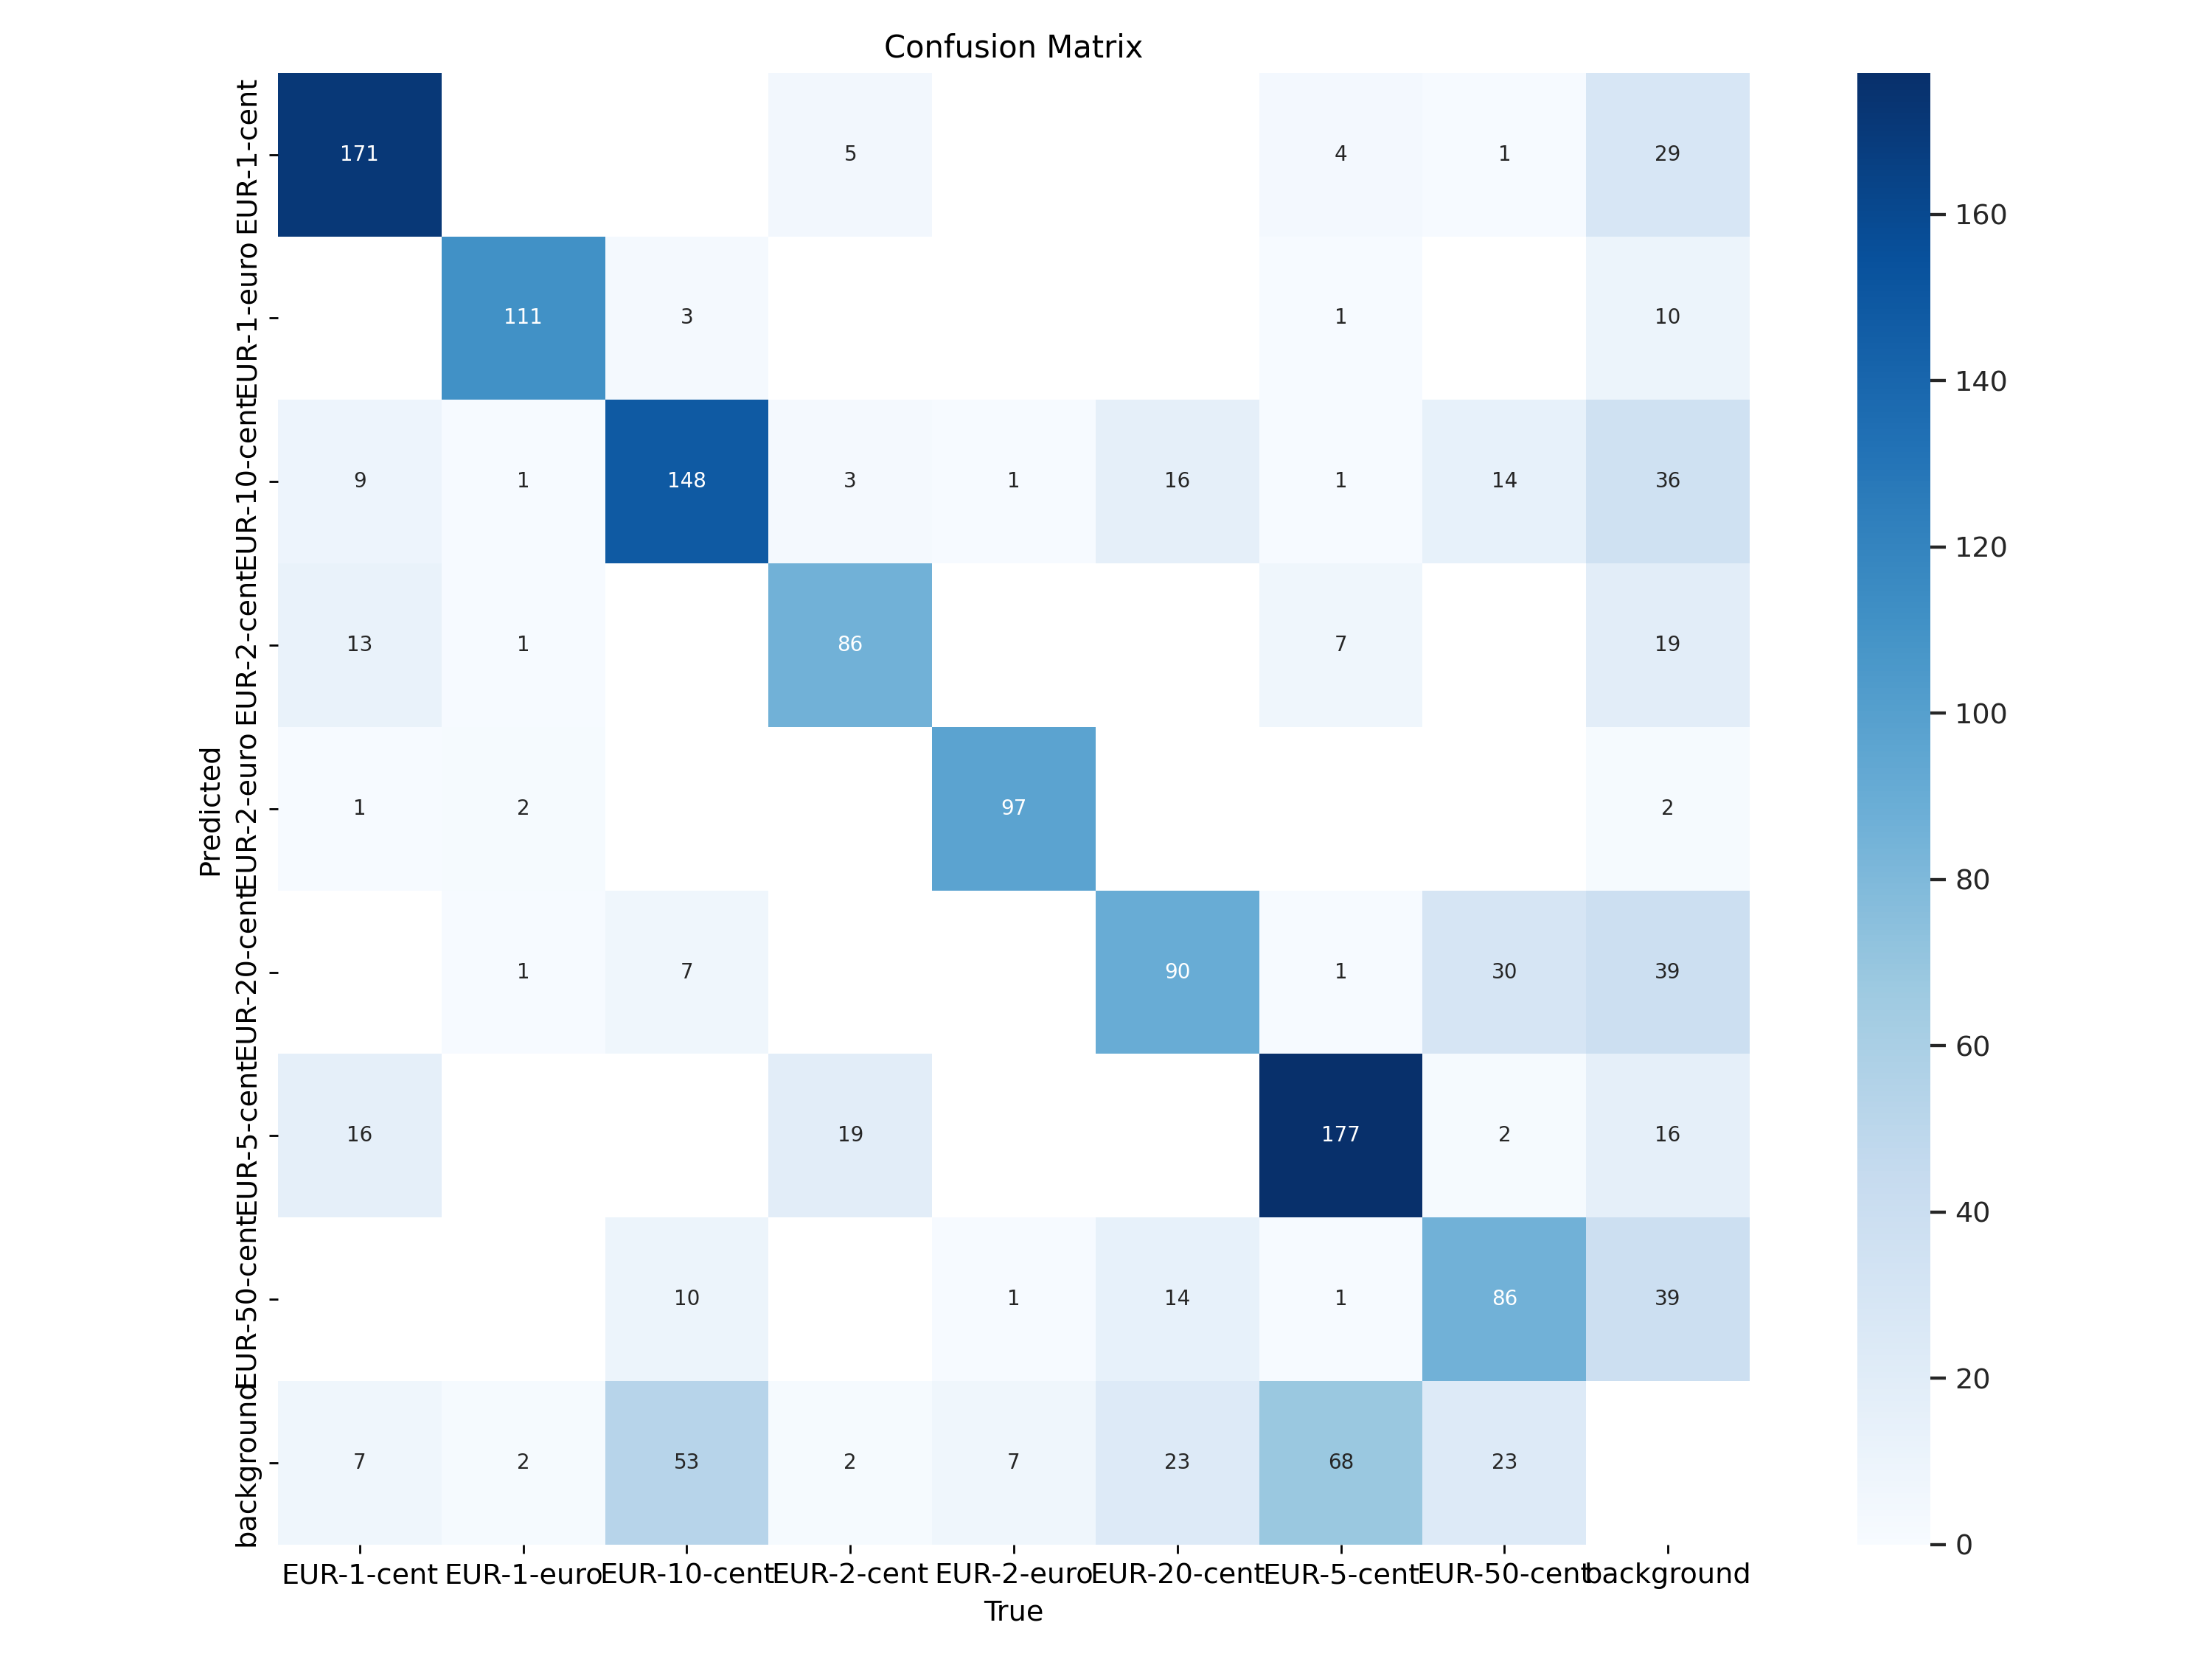

In [ ]:
Image(filename="runs/detect/train/confusion_matrix.png")

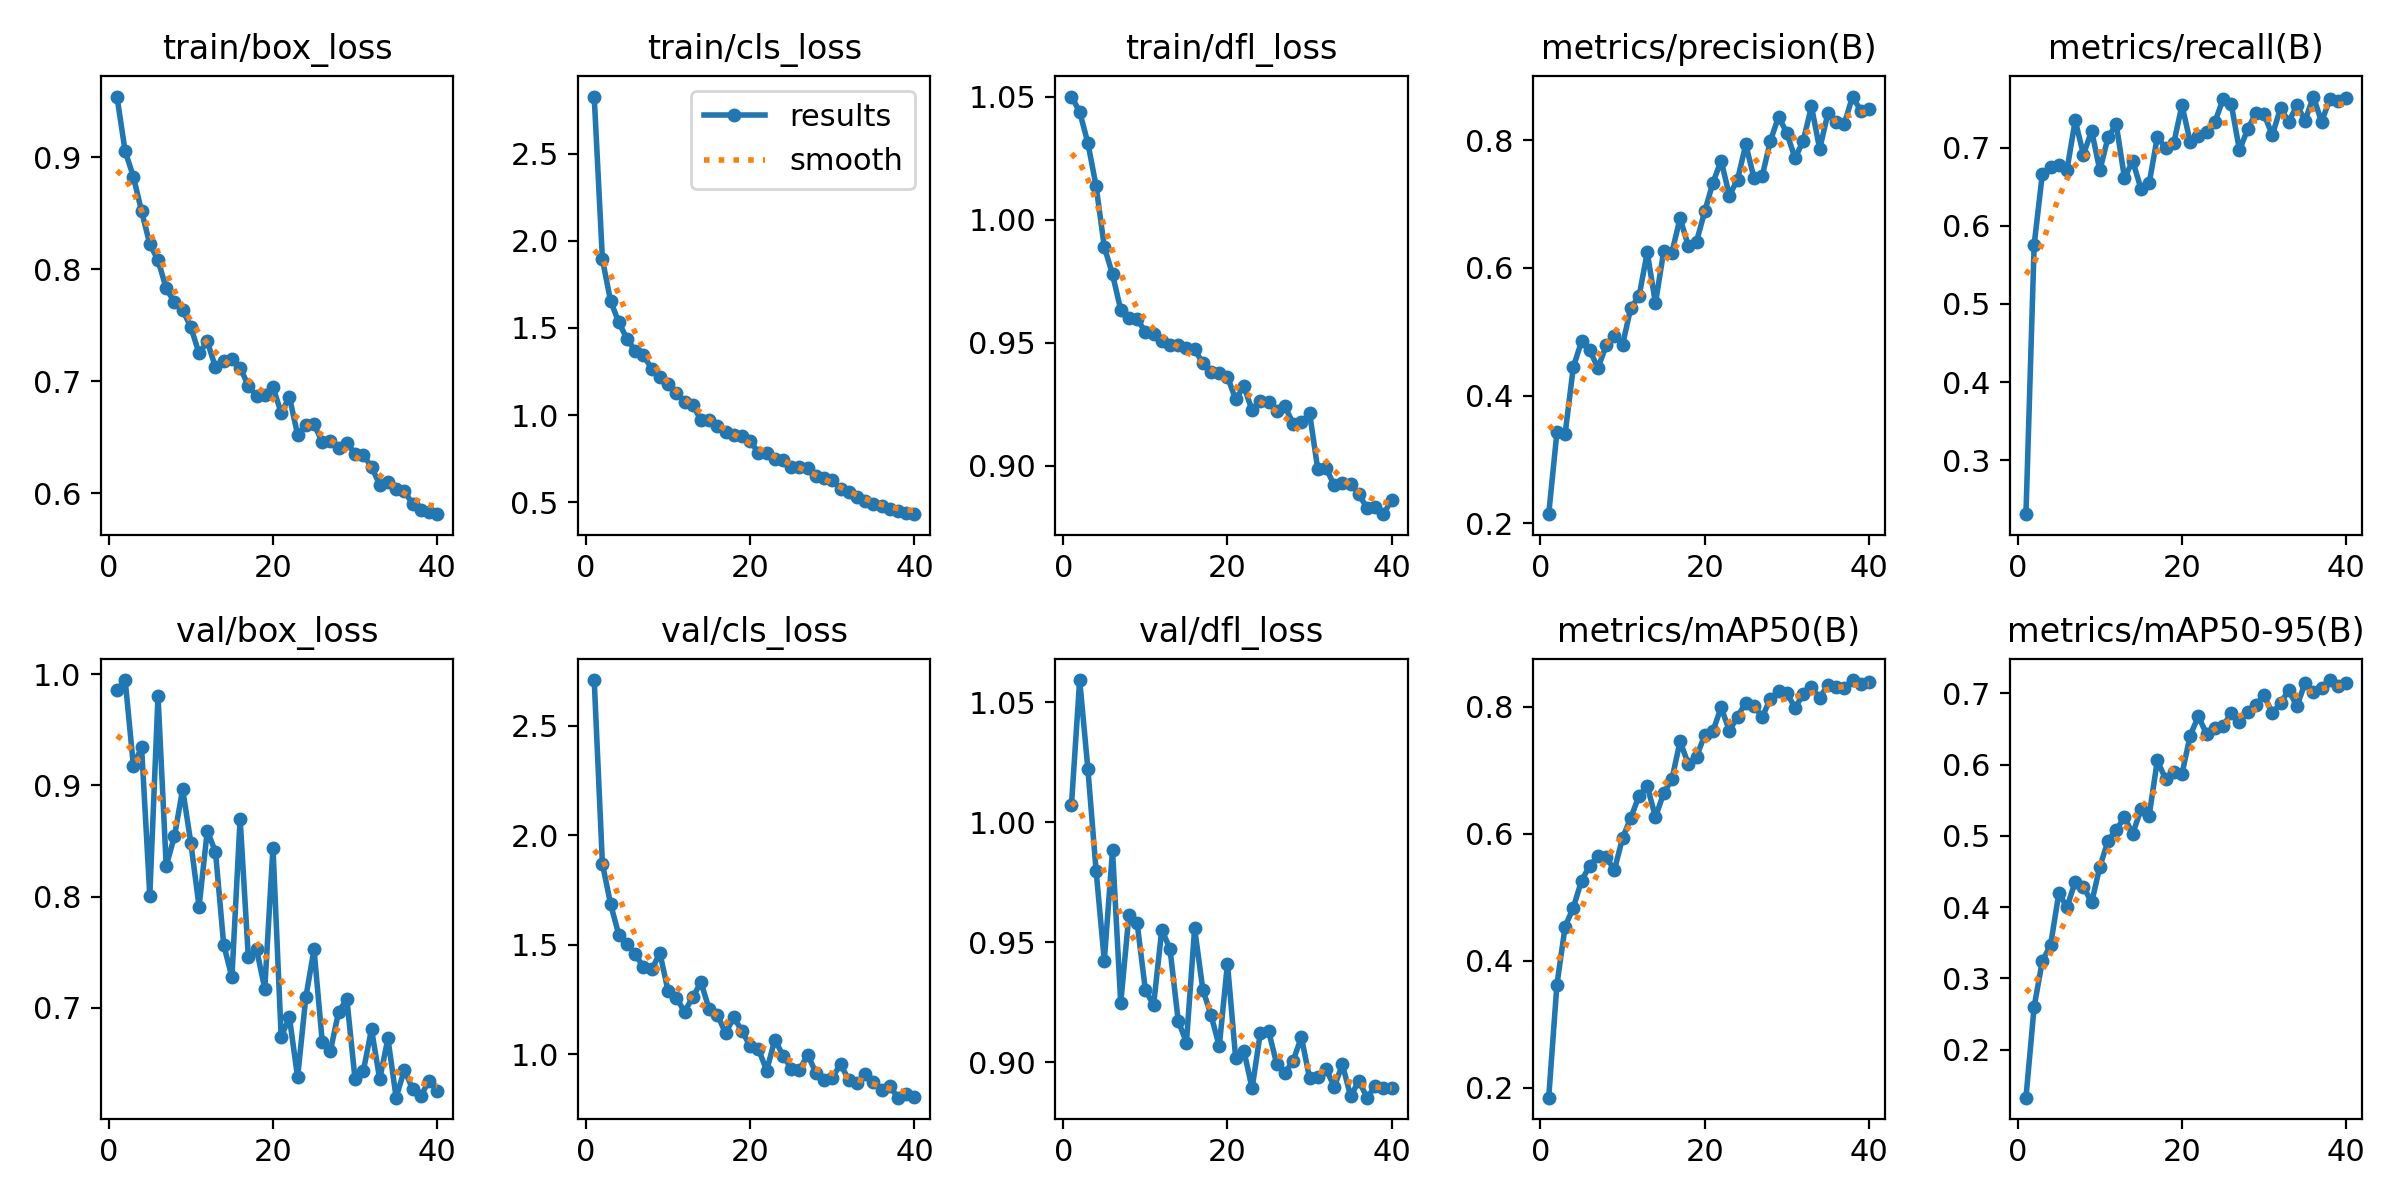

In [ ]:
Image(filename="runs/detect/train/results.png")

## Inference

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Obj_detect')

In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('runs/detect/train/weights/best.pt')  # load a pretrained model (recommended for training)



In [ ]:
image_path = 'Small-object-detection-for-euro-coins-5/test/images/20210324_153530_jpg.rf.db778806cdff9dce80b81aee3228b02f.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Perform object detection
results = model(image)

In [ ]:
def detect_yolo(image_path):
    image_path = image_path
    image = cv2.imread(image_path)

    # Perform object detection
    results = model(image)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get the predictions
    boxes = results[0].boxes  # Get the detected boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Get the coordinates of the box
        label = box.cls.item()  # Get the class label
        confidence = box.conf.item()  # Get the confidence score as a Python float
        # Draw the box and label on the image
        cv2.rectangle(image_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
        cv2.putText(image_rgb, f'{model.names[int(label)]} {confidence:.2f}', (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()
    return results


0: 640x640 1 EUR-2-cent, 11.3ms
Speed: 3.4ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


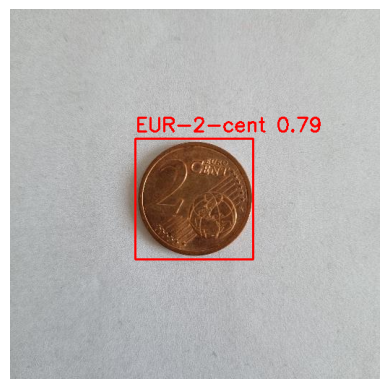

In [ ]:
res  = detect_yolo("Small-object-detection-for-euro-coins-5/test/images/20210324_153530_jpg.rf.db778806cdff9dce80b81aee3228b02f.jpg")

In [ ]:
result_vid = model.track(source = 'IMG_7776.mp4', show = True, save= True, tracker = 'bytetrack.yaml')

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/550) /content/drive/MyDrive/Obj_detect/IMG_7776.mp4: 384x640 1 EUR-1-cent, 158.0ms
video 1/1 (frame 2/550) /content/drive/MyDrive/Obj_detect/IMG_7776.mp4: 384x640 1 EUR-1-cent, 7.6ms
video 1/1 (frame 3/550) /content/drive/MyDrive/Obj_detect/IMG_7776.mp4: 384x640 1 EUR-1-cent, 8.1ms
video 1/1 (frame 4/550) /content/drive/MyDrive/Obj_detect/IMG_7776.mp4: 384x640 